# Cleansing and Preparing messy data for ML models. 


# First load data and inspect. This data is dealing will Insurance fraud.

In [1]:
# Before any thing else lets load some basic python libraries.
import pandas as pd
import scipy
import IPython
import numpy as np
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
#For visualizing bigger dataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Ignoring Warnings 
import warnings
warnings.filterwarnings("ignore")

In [4]:
conda list python -f

# packages in environment at C:\Users\MK\anaconda3:
#
# Name                    Version                   Build  Channel
python                    3.8.5                h5fd99cc_1  

Note: you may need to restart the kernel to use updated packages.


# Step 1: Clean and prepare the data ready for model building

In [5]:
#now read the training data 
trn_raw=pd.read_csv('training_data.csv')
trn_raw.head(10)
#trn_raw.shape

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,$-908.650758424405,7.328029,36.601967,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,NaN,5-10 miles,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,mercedes,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,$-1864.9622875143,6.796408,3.789176,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,5-10 miles,11.389081,99074.100620,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,$-543.187402955527,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,$-182.626380634258,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,-0.275406,90.76

**At the first glance, we can see the data has 100 featuresbut we don’t know what they mean since it does not have an informative headers. These features are either numerical values (which are mostly continuous) or categorical values (either strings or boolean). Some of the categorical values make sense like the days, months name, state names, car model etc. But everything else is a tough guess. So it’s hard to decide how to feature engineer this data set because we are not provided with how the data were collected or any data dictionaries. So creating new feature here will probably add more complexity. Next step will be to check if we can make sense of data where we may drop some biased and skewed features. But before that lets check if the given raw data is balanced or not based on the predicted y feature.**

Before we do anything,lets check if the given raw data is balanced or not, based on the predicted y feature.

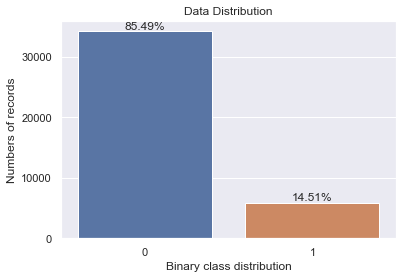

In [6]:
#also lets check if the data is balanced based on predicted class values in term of percentage

# Graphical representation of the target label percentage.
total_len = len(trn_raw['y'])
sns.set()
sns.countplot(trn_raw['y']).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Binary class distribution")
ax.set_ylabel("Numbers of records")
plt.show()

**Based on this information now we know that the data has imbalanced class prediction. So we will need to do some sort of data balancing for this data. I will run a couple model scenario one with the data as unbalanced and one with applying some balanacing later in the process.**

**Before I start cleaning the data and breaking them into various section I will separate the predicted y class from the raw data.**

In [7]:
#Now lets separate the predicted value feature from the data
train_predict=trn_raw[['y']]
#train_predict.head()

In [8]:
#Now lets check the data types of the features
trn_raw.dtypes

y         int64
x1      float64
x2      float64
x3       object
x4      float64
x5      float64
x6      float64
x7       object
x8      float64
x9      float64
x10     float64
x11     float64
x12     float64
x13     float64
x14     float64
x15     float64
x16     float64
x17     float64
x18     float64
x19      object
x20     float64
x21     float64
x22     float64
x23     float64
x24      object
x25     float64
x26     float64
x27     float64
x28     float64
x29     float64
x30     float64
x31      object
x32     float64
x33      object
x34     float64
x35     float64
x36     float64
x37     float64
x38     float64
x39      object
x40     float64
x41     float64
x42     float64
x43     float64
x44     float64
x45     float64
x46     float64
x47     float64
x48     float64
x49     float64
x50     float64
x51     float64
x52     float64
x53     float64
x54     float64
x55     float64
x56     float64
x57     float64
x58     float64
x59       int64
x60      object
x61     float64
x62     

**First thing is to separate the Category(Object) features and clean them and convert them into numerical values.**

In [9]:
#lets define Categorical data
trn_raw_category=trn_raw.loc[:,trn_raw.dtypes==np.object]
#trn_raw_category.shape
trn_raw_category.head()

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes


In [11]:
#summarize categorical variables and look at their properties
trn_raw_category.describe(include='all')

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
count,40000,40000,40000,36144,40000,32829,40000,40000,40000,30743,40000,27164
unique,14,663,40000,2,2,51,1,12,5,7,2,1
top,Wednesday,0.0022%,$1321.5823390953,female,no,California,5-10 miles,December,progressive,ford,no,yes
freq,4930,193,1,18158,34022,3393,40000,8136,10877,9005,35506,27164


In [13]:
#Based on this observation Column x39 and x99 are qunique with only one kind of values. 
# they will have no impact on the model. So lets drop them.
nunique = trn_raw_category.nunique()
cols_to_drop = nunique[nunique == 1].index
trn_raw_category = trn_raw_category.drop(cols_to_drop, axis=1)
trn_raw_category.describe(include='all')

,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
count,40000,40000,40000,36144,40000,32829,40000,40000,30743,40000
unique,14,663,40000,2,2,51,12,5,7,2
top,Wednesday,0.0022%,$1321.5823390953,female,no,California,December,progressive,ford,no
freq,4930,193,1,18158,34022,3393,8136,10877,9005,35506


**We can see that features x24, x33 and x77 have a lot of null values. The best way to impute the null values for categorical features is to use the mode or max frequency method and replace the null with the variables that has maximum freqency.**

In [14]:
#lets find the null values in these categorical data and impute them with mode(max frequency)methos
for col in trn_raw_category:
    max_freq = trn_raw_category[col].value_counts().index[0]
    trn_raw_category[col][pd.isna(trn_raw_category[col])] = max_freq


In [15]:
trn_raw_category.describe(include='all')

,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
count,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000
unique,14,663,40000,2,2,51,12,5,7,2
top,Wednesday,0.0022%,$1321.5823390953,female,no,California,December,progressive,ford,no
freq,4930,193,1,22014,34022,10564,8136,10877,18262,35506


In [16]:
# Next,lets remove % sign from column x7 and x19
trn_raw_category['x7'] = trn_raw_category['x7'].replace('\%','',regex=True).astype(float)
trn_raw_category['x19'] = trn_raw_category['x19'].replace('\$','',regex=True).astype(float)
trn_raw_category.head()

,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
0,Wed,0.0062,-908.650758,female,no,Colorado,August,farmers,mercedes,no
1,Friday,0.0064,-1864.962288,male,no,Tennessee,April,allstate,mercedes,no
2,Thursday,-0.0008,-543.187403,male,no,Texas,September,geico,subaru,no
3,Tuesday,-0.0057,-182.626381,male,no,Minnesota,September,geico,nissan,no
4,Sunday,0.0109,967.007091,male,yes,New York,January,geico,toyota,yes


In [17]:
#features X31 and X93 are binary class with Yes and no nominal values.Lets convert them into numerical values of 0 and 1
trn_raw_category['x31']=trn_raw_category['x31'].replace(['no','yes'],[0,1])
trn_raw_category['x93']=trn_raw_category['x93'].replace(['no','yes'],[0,1])
trn_raw_category.head()

,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
0,Wed,0.0062,-908.650758,female,0,Colorado,August,farmers,mercedes,0
1,Friday,0.0064,-1864.962288,male,0,Tennessee,April,allstate,mercedes,0
2,Thursday,-0.0008,-543.187403,male,0,Texas,September,geico,subaru,0
3,Tuesday,-0.0057,-182.626381,male,0,Minnesota,September,geico,nissan,0
4,Sunday,0.0109,967.007091,male,1,New York,January,geico,toyota,1


In [18]:
# Now lets work with days and lets make them uniform Ordinals
trn_raw_category["x3"].replace({"Sat": "Saturday", "Sun": "Sunday", "Mon": "Monday", "Tue": "Tuesday",
                  "Wed": "Wednesday", "Thur": "Thursday", "Fri": "Friday"}, inplace=True)

In [19]:
trn_raw_category.x3.value_counts()

Wednesday    6973
Tuesday      6863
Monday       6344
Friday       5595
Saturday     5383
Thursday     4434
Sunday       4408
Name: x3, dtype: int64

In [20]:
#Another nomial category is gender so we can convert male/female gender into 0 & 1
trn_raw_category['x24']=trn_raw_category['x24'].replace(['female','male'],[0,1])
trn_raw_category.head()

,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
0,Wednesday,0.0062,-908.650758,0,0,Colorado,August,farmers,mercedes,0
1,Friday,0.0064,-1864.962288,1,0,Tennessee,April,allstate,mercedes,0
2,Thursday,-0.0008,-543.187403,1,0,Texas,September,geico,subaru,0
3,Tuesday,-0.0057,-182.626381,1,0,Minnesota,September,geico,nissan,0
4,Sunday,0.0109,967.007091,1,1,New York,January,geico,toyota,1


In [21]:
#lets see the no of labels and uniques values in the category data
for col in trn_raw_category.columns[0:]:
    print(col,': ', len(trn_raw_category[col].unique()),'labels')

x3 :  7 labels
x7 :  663 labels
x19 :  40000 labels
x24 :  2 labels
x31 :  2 labels
x33 :  51 labels
x60 :  12 labels
x65 :  5 labels
x77 :  7 labels
x93 :  2 labels


**Based on the stats one hot encoding is not so suitable here as it will create multiple features and increase dimensionality by many folds. This method can add to un necessary problems. Among other methods, I will use label frequency based imputer. This wont add any further features and help to keep the data size in check and balance.**

In [22]:
#Now I will convert them with dictionary frequency,save to a mapping function and map it back to dictionary 
#Tried label encoder it did not worked properly. 
freq=trn_raw_category.x3.value_counts().to_dict()
trn_raw_category.x3=trn_raw_category.x3.map(freq)

In [23]:
# For States X33
freq1=trn_raw_category.x33.value_counts().to_dict()
trn_raw_category.x33=trn_raw_category.x33.map(freq1)

In [24]:
##for months x60
freq2=trn_raw_category.x60.value_counts().to_dict()
trn_raw_category.x60=trn_raw_category.x60.map(freq2)

In [25]:
#for months x65
freq3=trn_raw_category.x65.value_counts().to_dict()
trn_raw_category.x65=trn_raw_category.x65.map(freq3)

In [26]:
#for months x77
freq4=trn_raw_category.x77.value_counts().to_dict()
trn_raw_category.x77=trn_raw_category.x77.map(freq4)

In [27]:
trn_raw_category.head()

,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
0,6973,0.0062,-908.650758,0,0,530,7907,5600,4494,0
1,5595,0.0064,-1864.962288,1,0,690,951,10859,4494,0
2,4434,-0.0008,-543.187403,1,0,2252,1245,5520,5047,0
3,6863,-0.0057,-182.626381,1,0,611,1245,5520,2575,0
4,4408,0.0109,967.007091,1,1,1714,7922,5520,3555,1


**Now lets add back the categorical values converted to float into numerical categories in the dataFrame.**


In [28]:
#Now lets separate the data with numeric values only from the raw DataFrame
trn_raw_num = trn_raw.loc[:,trn_raw.dtypes == np.float64]
trn_raw_num.head()

,x1,x2,x4,x5,x6,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x25,x26,x27,x28,x29,x30,x32,x34,x35,x36,x37,x38,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x61,x62,x63,x64,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,0.165254,18.060003,1.077380,-1.339233,-1.584341,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,7.328029,36.601967,126.384294,1.264713,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,-0.597288,46.667221,3.159002,69.444841,32.450076,NaN,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,9.840873,6.600008,1.252479,46.992716,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,5.492487,NaN,10.255579,7.627730,104.251338
1,2.441471,18.416307,1.482586,0.920817,-0.759931,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,6.796408,3.789176,93.037021,0.346201,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,1.127376,47.928569,-1.013712,61.289132,35.521824,31.526217,11.389081,99074.100620,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,6.939395,3.864254,0.057936,48.216622,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,3.346429,4.321172,NaN,10.505284,101.230645
2,4.427278,19.188092,0.145652,0.366093,0.709962,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,3.802395,7.407996,71.022413,0.070968,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,2.605279,56.674425,0.108486,69.798923,30.684074,31.049447,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,6.228138,1.370661,-0.239705,54.120933,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,4.456565,NaN,8.754572,7.810979,109.345215
3,3.925235,19.901257,1.763602,-0.251926,-0.827461,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,7.728963,8.136213,121.610846,0.700954,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,1.071202,59.154933,1.319711,65.408246,34.401290,48.363690,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,6.005140,0.013162,0.318335,54.784192,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,4.100022,1.151085,NaN,9.178325,103.021970
4,2.868802,22.202473,3.405119,0.083162,1.381504,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,0.392002,-1.201565,100.626558,9.103015,77.977156,2.272765,24.452102,56.492317,-1.102387,6.313827,0.429187,949.904947,16.962710,0.510985,NaN,2.283921,46.445617,0.022747,66.662910,31.135261,31.819899,17.210430,NaN,NaN,1.012093,NaN,-0.348240,3.477451,47.844153,55.921988,NaN,2345.195505,3.253079,14.193721,71.853326,0.926779,4.115990,-2.273628,NaN,149.725023,7.654926,1.305936,0.418272,51.486405,-0.195764,14.402071,12.227512,-2.951163,1.096548,-0.

In [29]:
# Now lets create a new dataset with all numerical values
trn_Numerical=pd.concat([trn_raw_num,trn_raw_category], axis=1)

In [30]:
trn_Numerical.head()

,x1,x2,x4,x5,x6,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x25,x26,x27,x28,x29,x30,x32,x34,x35,x36,x37,x38,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x61,x62,x63,x64,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
0,0.165254,18.060003,1.077380,-1.339233,-1.584341,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,7.328029,36.601967,126.384294,1.264713,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,-0.597288,46.667221,3.159002,69.444841,32.450076,NaN,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,9.840873,6.600008,1.252479,46.992716,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,5.492487,NaN,10.255579,7.627730,104.251338,6973,0.0062,-908.650758,0,0,530,7907,5600,4494,0
1,2.441471,18.416307,1.482586,0.920817,-0.759931,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,6.796408,3.789176,93.037021,0.346201,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,1.127376,47.928569,-1.013712,61.289132,35.521824,31.526217,11.389081,99074.100620,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,6.939395,3.864254,0.057936,48.216622,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,3.346429,4.321172,NaN,10.505284,101.230645,5595,0.0064,-1864.962288,1,0,690,951,10859,4494,0
2,4.427278,19.188092,0.145652,0.366093,0.709962,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,3.802395,7.407996,71.022413,0.070968,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,2.605279,56.674425,0.108486,69.798923,30.684074,31.049447,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,6.228138,1.370661,-0.239705,54.120933,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,4.456565,NaN,8.754572,7.810979,109.345215,4434,-0.0008,-543.187403,1,0,2252,1245,5520,5047,0
3,3.925235,19.901257,1.763602,-0.251926,-0.827461,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,7.728963,8.136213,121.610846,0.700954,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,1.071202,59.154933,1.319711,65.408246,34.401290,48.363690,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,6.005140,0.013162,0.318335,54.784192,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,4.100022,1.151085,NaN,9.178325,103.021970,6863,-0.0057,-182.626381,1,0,611,1245,5520,2575,0
4,2.868802,22.202473,3.405119,0.083162,1.381504,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,0.392002,-1.201565,100.626558,9.103015,77.977156,2.272765,24.452102,56.492317,-1.102387,6.313827,0.429187,949.904947,16.962710,0.510985,NaN,2.283921,46.445617,0.022747,66.662910,31.135261,31.819899,17.210430

In [31]:
#summarize categorical variables
trn_Numerical.describe(include='all')

,x1,x2,x4,x5,x6,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x20,x21,x22,x23,x25,x26,x27,x28,x29,x30,x32,x34,x35,x36,x37,x38,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x61,x62,x63,x64,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
count,40000.000000,40000.000000,40000.000000,37572.000000,40000.000000,40000.000000,40000.000000,40000.000000,34890.000000,40000.000000,40000.000000,30136.000000,40000.000000,28788.000000,40000.000000,40000.000000,40000.000000,40000.000000,37613.000000,40000.000000,40000.000000,37567.000000,40000.000000,40000.000000,40000.000000,7664.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,37598.000000,40000.000000,30497.000000,30271.000000,40000.000000,5753.000000,31991.000000,40000.000000,40000.000000,40000.000000,27177.000000,40000.000000,40000.000000,23818.000000,40000.000000,27272.000000,22304.000000,40000.000000,7536.000000,40000.000000,32707.000000,40000.000000,37580.000000,34899.000000,40000.000000,37575.000000,37616.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,27084.000000,34755.000000,34751.000000,28627.000000,37570.000000,34744.000000,40000.000000,40000.000000,37572.000000,40000.000000,30285.000000,37593.000000,40000.000000,37669.000000,29309.000000,40000.000000,34741.000000,37565.000000,37660.000000,27396.000000,33362.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,2.999958,20.004865,0.002950,0.005396,0.007234,0.004371,2.722334,0.490339,100.008988,3.039317,3.881807,0.787999,0.011162,100.702408,8.005758,79.936742,4.962774,11.030799,72.135445,0.202855,4.979892,0.001688,999.260857,15.022117,1.009982,0.020762,0.552148,52.971716,1.377624,70.003007,31.005898,36.039836,14.966821,99994.120795,0.651686,0.504630,1.115563,0.564405,0.025262,49.979288,60.012715,10.299127,2099.960510,1.478683,4.986956,69.980858,0.004900,3.017140,0.498347,32.660648,300.422034,10.017561,3.820924,-0.004021,50.020462,0.000904,14.415957,14.934315,0.000815,0.735386,0.000997,49.951629,6.928531,-0.001297,1.427536,-1.024062,49.933173,0.899255,10.024464,0.021090,-6.096573,3.820098,2.138496,99.987203,49.985343,-0.006049,0.453763,10.767838,3.000166,0.001636,4.002896,3.969385,0.031886,10.525530,10.002814,100.024743,5883.534200,0.000033,-5.028013,0.449650,0.149450,3464.641600,6565.577500,8727.353650,10616.569900,0.112350
std,1.994490,1.604291,1.462185,1.297952,1.358551,1.447223,1.966828,1.029863,13.343010,3.575534,2.678838,0.751117,1.480175,1.058560,2.270345,6.514228,3.544050,15.652503,26.890151,1.020094,2.442622,1.562125,104.197073,3.669128,1.418182,1.565846,1.893282,5.808011,1.678159,4.279912,3.397154,26.155245,3.243429,1343.329651,1.165203,1.033895,1.611816,1.204236,1.773983,4.438896,5.517545,2.696886,946.689773,1.580287,7.245175,4.975141,1.356709,1.844189,1.451026,8.419679,35.005180,3.441451,2.236371,1.513578,4.986917,1.476789,1.160265,6.336299,1.352481,0.366656,0.426451,6.513115,5.592746,1.443795,2.390149,1.213259,4.178547,0.300995,2.566513,1.548012,2.287201,2.514043,0.780404,10.455759,4.813166,1.180598,1.090578,3.732763,1.164411,1.468790,3.017420,1.473939,1.823091,1.437581,1.986984,5.247514,960.918821,0.009965,1001.312630,0.497465,0.356536,4283.289735,2785.700126,2393.090959,7053.903039,0.315801
min,-3.648431,13.714945,-5.137161,-5.616412,-6.113153,-6.376810,-3.143438,-3.538129,50.526543,-5.846331,-3.060994,-0.338985,-6.141315,99.131018,-1.384508,66.756855,-9.561032,-3.819778,4.263648,-3.943834,-2.489909,-6.516479,604.067215,-1.074573,-4.165802,-4.775358,-3.966788,29.351461,-3.500424,52.327899,17.179476,-4.198270,9.999943,94236.454769,-1.187438,-4.538490,-3.697254,-1.319167,-7.269258,31.919387,37.797055,0.521112,-1630.227579,-3.523781,-23.955783,47.976420,-5.191496,0.248270,-5.457856,13.882758,98.627537,1.610473,-3.990470,-1

In [32]:
#lets check the datatypes
print(trn_Numerical.shape)
#trn_Numerical.dtypes

(40000, 96)


**Now its time to clean up Numerical data. First I will check the percentage of missing values on this data and set up athreshold of when to ignore the features and when to impute the values for null.**

In [33]:
# lets find the percentage of null values in each of the column from the clearner version of data
total =trn_Numerical .isnull().sum().sort_values(ascending=False)
miss_perc = trn_Numerical.isnull().sum()/trn_Numerical.isnull().count()*100
percent= (round(miss_perc, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data

,Total,%
x44,34247,85.6
x57,32464,81.2
x30,32336,80.8
x55,17696,44.2
x52,16182,40.5
x74,12916,32.3
x49,12823,32.1
x54,12728,31.8
x95,12604,31.5
x78,11373,28.4


**Without clearly kowing the physical meaning of all these features and trying to impute all these columns with numerical values is not making sense. So, I am choosing an arbitarary percentage cut off of 20% and will drop the columns that has missing values of more than 20%. So 17 features with high missing values will be dropped.**

In [34]:
#dropping columns with missing values more than 20%
trn_df = trn_Numerical.loc[:, trn_Numerical.isnull().mean() < .20]
trn_df.shape

(40000, 79)

Now lets do the numerical imputation for all numerical values using iterative imputer. 
Doing multiple imputation does not make sense here since we dont know what these varaible and features really mean.

In [35]:
# I am going to do a iterative imputer 
from fancyimpute import IterativeImputer

#calling MICE imputer
mice_imp = IterativeImputer()
#now impute missing values with MICEimputer
imp_trn_df = pd.DataFrame(mice_imp.fit_transform(trn_df))
imp_trn_df.index = trn_df.index
imp_trn_df.columns = trn_df.columns

In [36]:
# Now I will check for if there are any null values
NAs = pd.concat([imp_trn_df.isnull().sum()], axis=1)
NAs[NAs.sum(axis=1) > 0]

,0


In [37]:
imp_trn_df.head()

,x1,x2,x4,x5,x6,x8,x9,x10,x11,x12,x13,x15,x17,x18,x20,x21,x22,x23,x25,x26,x27,x28,x29,x32,x34,x35,x36,x37,x38,x40,x43,x46,x47,x48,x50,x51,x53,x56,x58,x61,x62,x63,x64,x66,x67,x68,x69,x70,x71,x72,x73,x75,x76,x79,x80,x81,x82,x83,x84,x86,x87,x88,x90,x91,x92,x94,x96,x97,x100,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
0,0.165254,18.060003,1.077380,-1.339233,-1.584341,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,-0.587361,4.278444,77.709700,7.328029,36.601967,126.384294,1.264713,3.834082,2.352406,905.491445,14.779467,0.752524,-0.597288,46.667221,3.159002,69.444841,32.450076,36.190614,18.129499,1.227266,0.234654,53.359113,58.251700,1602.756464,2.740134,72.167186,-1.532562,300.629990,9.840873,6.600008,1.252479,46.992716,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,2.257965,-0.308807,1.000000,11.131462,-0.471594,-3.261865,0.085710,0.383351,47.872599,-0.162668,1.079562,2.770844,-0.397427,0.909479,5.492487,10.255579,7.627730,104.251338,6973.0,0.0062,-908.650758,0.0,0.0,530.0,7907.0,5600.0,4494.0,0.0
1,2.441471,18.416307,1.482586,0.920817,-0.759931,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,-1.165869,8.487132,70.808566,6.796408,3.789176,93.037021,0.346201,4.345028,1.651579,868.784447,25.914680,1.445294,1.127376,47.928569,-1.013712,61.289132,35.521824,31.526217,11.389081,-0.822055,1.104631,37.728834,56.052749,3350.837875,1.995635,73.964560,0.956001,300.629990,6.939395,3.864254,0.057936,48.216622,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,0.666354,-2.870800,0.898121,11.715043,1.691428,-4.789183,4.684722,2.138771,46.584780,1.252022,1.223852,3.703013,0.656651,9.093466,3.346429,8.131469,10.505284,101.230645,5595.0,0.0064,-1864.962288,1.0,0.0,690.0,951.0,10859.0,4494.0,0.0
2,4.427278,19.188092,0.145652,0.366093,0.709962,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.211685,8.601193,75.922820,3.802395,7.407996,71.022413,0.070968,4.332644,-0.375737,1077.233497,13.177479,4.174536,2.605279,56.674425,0.108486,69.798923,30.684074,31.049447,14.372443,0.150728,-2.561083,50.236892,63.975108,3756.910196,1.772648,59.428690,4.127857,182.369349,6.228138,1.370661,-0.239705,54.120933,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,1.124866,-3.558718,1.000000,5.660882,-2.608974,-6.387984,2.506272,2.138771,53.977291,0.657292,-0.353469,3.997183,2.059615,0.305170,4.456565,8.754572,7.810979,109.345215,4434.0,-0.0008,-543.187403,1.0,0.0,2252.0,1245.0,5520.0,5047.0,0.0
3,3.925235,19.901257,1.763602,-0.251926,-0.827461,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,-2.046856,6.611554,74.966925,7.728963,8.136213,121.610846,0.700954,7.294990,-0.603983,1051.655489,17.006528,2.347355,1.071202,59.154933,1.319711,65.408246,34.401290,48.363690,13.191173,-0.965711,-2.123048,41.857197,59.226119,1961.609788,3.155214,68.671023,0.663759,300.629990,6.005140,0.013162,0.318335,54.784192,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.726010,-0.398417,1.000000,7.472328,1.424316,-5.431998,3.285291,2.138771,49.543472,2.066346,1.761266,2.933707,0.899392,5.971782,4.100022,8.844659,9.178325,103.021970,6863.0,-0.0057,-182.626381,1.0,0.0,611.0,1245.0,5520.0,2575.0,0.0
4,2.868802,22.202473,3.405119,0.083162,1.381504,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,-1.201565,9.103015,77.977156,2.272765,24.452102,56.492317,-1.102387,6.313827,0.429187,949.904947,16.962710,0.510985,2.283921,46.445617,0.022747,66.662910,31.135261,31.819899,17.210430,1.012093,3.477451,47.844153,55.921988,2345.195505,3.253079,71.853326,-2.273628,149.725023,7.654926,1.305936,0.418272,51.486405,-0.195764,14.402071,12.227512,-2.951163,1.096548,-0.000234,51.349106,9.422401,1.884259,0.019803,1.000000,6.530625,0.705003,-5.664815,3.395916,2.138771,54.843346,0.663113,-0.952377,2.922302,3.003595,1.046096,3.234033,9.987006,11.702664,92.925935,4408.0,0.0109,967.007091,1.0,1.0,1714.0,7922.0,5520.0,3555.0,1.0


In [38]:
# now lets rearrange the columns for the cleaner data from x1 through x100 features

imp_trn_df1=imp_trn_df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9','x10',
                       'x11', 'x12', 'x13', 'x15', 'x17', 'x18', 'x19','x20',
                       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
                       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38','x40',
                       'x43', 'x46', 'x47', 'x48', 'x50','x51', 'x53', 'x56', 'x58', 'x60',
                       'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69','x70',
                       'x71', 'x72', 'x73','x75', 'x76', 'x77', 'x79','x80',
                       'x81', 'x82', 'x83', 'x84', 'x86', 'x87', 'x88','x90',
                       'x91', 'x92', 'x93', 'x94', 'x96', 'x97', 'x100']]

In [39]:
imp_trn_df1.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x15,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x31,x32,x33,x34,x35,x36,x37,x38,x40,x43,x46,x47,x48,x50,x51,x53,x56,x58,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x75,x76,x77,x79,x80,x81,x82,x83,x84,x86,x87,x88,x90,x91,x92,x93,x94,x96,x97,x100
0,0.165254,18.060003,6973.0,1.077380,-1.339233,-1.584341,0.0062,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,-0.587361,4.278444,77.709700,-908.650758,7.328029,36.601967,126.384294,1.264713,0.0,3.834082,2.352406,905.491445,14.779467,0.752524,0.0,-0.597288,530.0,46.667221,3.159002,69.444841,32.450076,36.190614,18.129499,1.227266,0.234654,53.359113,58.251700,1602.756464,2.740134,72.167186,-1.532562,300.629990,7907.0,9.840873,6.600008,1.252479,46.992716,5600.0,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,2.257965,-0.308807,4494.0,1.000000,11.131462,-0.471594,-3.261865,0.085710,0.383351,47.872599,-0.162668,1.079562,2.770844,-0.397427,0.909479,0.0,5.492487,10.255579,7.627730,104.251338
1,2.441471,18.416307,5595.0,1.482586,0.920817,-0.759931,0.0064,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,-1.165869,8.487132,70.808566,-1864.962288,6.796408,3.789176,93.037021,0.346201,1.0,4.345028,1.651579,868.784447,25.914680,1.445294,0.0,1.127376,690.0,47.928569,-1.013712,61.289132,35.521824,31.526217,11.389081,-0.822055,1.104631,37.728834,56.052749,3350.837875,1.995635,73.964560,0.956001,300.629990,951.0,6.939395,3.864254,0.057936,48.216622,10859.0,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,0.666354,-2.870800,4494.0,0.898121,11.715043,1.691428,-4.789183,4.684722,2.138771,46.584780,1.252022,1.223852,3.703013,0.656651,9.093466,0.0,3.346429,8.131469,10.505284,101.230645
2,4.427278,19.188092,4434.0,0.145652,0.366093,0.709962,-0.0008,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.211685,8.601193,75.922820,-543.187403,3.802395,7.407996,71.022413,0.070968,1.0,4.332644,-0.375737,1077.233497,13.177479,4.174536,0.0,2.605279,2252.0,56.674425,0.108486,69.798923,30.684074,31.049447,14.372443,0.150728,-2.561083,50.236892,63.975108,3756.910196,1.772648,59.428690,4.127857,182.369349,1245.0,6.228138,1.370661,-0.239705,54.120933,5520.0,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,1.124866,-3.558718,5047.0,1.000000,5.660882,-2.608974,-6.387984,2.506272,2.138771,53.977291,0.657292,-0.353469,3.997183,2.059615,0.305170,0.0,4.456565,8.754572,7.810979,109.345215
3,3.925235,19.901257,6863.0,1.763602,-0.251926,-0.827461,-0.0057,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,-2.046856,6.611554,74.966925,-182.626381,7.728963,8.136213,121.610846,0.700954,1.0,7.294990,-0.603983,1051.655489,17.006528,2.347355,0.0,1.071202,611.0,59.154933,1.319711,65.408246,34.401290,48.363690,13.191173,-0.965711,-2.123048,41.857197,59.226119,1961.609788,3.155214,68.671023,0.663759,300.629990,1245.0,6.005140,0.013162,0.318335,54.784192,5520.0,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.726010,-0.398417,2575.0,1.000000,7.472328,1.424316,-5.431998,3.285291,2.138771,49.543472,2.066346,1.761266,2.933707,0.899392,5.971782,0.0,4.100022,8.844659,9.178325,103.021970
4,2.868802,22.202473,4408.0,3.405119,0.083162,1.381504,0.0109,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,-1.201565,9.103015,77.977156,967.007091,2.272765,24.452102,56.492317,-1.102387,1.0,6.313827,0.429187,949.904947,16.962710,0.510985,1.0,2.283921,1714.0,46.445617,0.022747,66.662910,31.135261,31.819899,17.210430,1.012093,3.477451,47.844153,55.921988,2345.195505,3.253079,71.853326,-2.273628,149.725023,7922.0,7.654926,1.305936,0.418272,51.486405,5520.0,-0.195764,14.402071,12.227512,-2.951163,1.096548,-0.000234,51.349106,9.422401,1.884259,0.019803,3555.0,1.000000,6.530625,0.705003,-5.664815,3.395916,2.138771,54.843346,0.663113,-0.952377,2.922302,3.003595,1.046096,1.0,3.234033,9.987006,11.702664,92.925935


In [40]:
imp_trn_df1.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x15', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23',
       'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x31', 'x32', 'x33', 'x34',
       'x35', 'x36', 'x37', 'x38', 'x40', 'x43', 'x46', 'x47', 'x48', 'x50',
       'x51', 'x53', 'x56', 'x58', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65',
       'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x75', 'x76',
       'x77', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x86', 'x87', 'x88',
       'x90', 'x91', 'x92', 'x93', 'x94', 'x96', 'x97', 'x100'],
      dtype='object')

In [41]:
sc=StandardScaler()
imp_trn_df[imp_trn_df1.columns]=sc.fit_transform(imp_trn_df1[imp_trn_df1.columns])

In [42]:
imp_trn_df.head()

,x1,x2,x4,x5,x6,x8,x9,x10,x11,x12,x13,x15,x17,x18,x20,x21,x22,x23,x25,x26,x27,x28,x29,x32,x34,x35,x36,x37,x38,x40,x43,x46,x47,x48,x50,x51,x53,x56,x58,x61,x62,x63,x64,x66,x67,x68,x69,x70,x71,x72,x73,x75,x76,x79,x80,x81,x82,x83,x84,x86,x87,x88,x90,x91,x92,x94,x96,x97,x100,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
0,-1.421286,-1.212302,0.734820,-1.047197,-1.171538,0.149538,-0.460571,0.661698,0.726281,0.448960,0.348319,-0.404365,-1.641760,-0.341878,0.667396,1.633700,2.080455,1.040955,-0.469096,1.517841,-0.899935,-0.066134,-0.181543,-0.607120,-1.085496,1.061521,-0.130417,0.425119,0.005939,0.975115,0.698954,0.118036,0.761421,-0.319170,-0.525209,0.798252,0.439456,-1.399654,0.005941,-0.050981,1.242691,0.842283,-0.612895,0.820130,-1.348136,0.053410,0.382885,-0.522617,-2.142134,0.548119,0.142184,0.361431,0.593059,0.345388,0.434538,-0.318273,1.239394,-1.491237,-2.249051,-0.439990,-0.132662,0.589261,-0.196945,-0.278604,-1.057843,1.043786,0.012738,-1.195336,0.805457,1.133789,0.618845,-0.902449,-0.903895,-0.419178,-0.685146,0.481545,-1.306842,-0.867980,-0.355767
1,-0.280019,-0.990205,1.011947,0.713660,-0.564701,0.820941,0.402488,0.902618,-1.202407,-0.441743,-0.910042,-0.795207,0.212029,-1.401285,0.517390,-0.462655,0.801586,0.140524,-0.259914,1.065887,-1.252224,2.968743,0.306955,0.303830,-0.868320,-1.424994,-2.036019,1.329343,-0.178006,-1.103087,-1.283206,0.608451,-2.759832,-0.717713,1.321334,0.327129,0.800731,0.315404,0.005941,-0.905175,0.019376,0.042198,-0.365246,0.499483,-0.012063,3.015289,-0.104401,0.767260,-0.002887,-0.484269,0.059334,-0.329280,-1.536296,-0.003861,0.663906,1.079035,0.571618,0.344975,0.000352,-0.707973,1.065635,0.725104,0.603615,0.453072,1.740928,-0.423755,-1.395653,0.252884,0.229807,-0.300273,0.638916,-1.857519,1.106324,-0.419178,-0.647791,-2.015525,0.890761,-0.867980,-0.355767
2,0.715641,-0.509124,0.097596,0.281462,0.517269,0.655022,-0.986047,-1.687003,-0.349635,-0.542804,-0.995126,0.135474,0.262270,-0.616185,-0.327420,-0.231455,-0.042675,-0.129291,-0.264984,-0.241502,0.748328,-0.502752,2.231444,1.084443,0.637526,-0.756277,-0.047685,-0.094735,-0.196808,-0.183258,-0.342304,-1.457949,0.058034,0.718153,1.750278,0.186022,-2.121005,2.501372,-3.372477,-1.114568,-1.095656,-0.157157,0.829450,-0.022945,-0.012063,0.520957,-0.606754,0.751190,-0.002887,-0.268630,0.430472,-0.130300,-2.108047,0.345388,-1.715595,-1.699016,-0.127411,-0.524798,0.000352,0.830342,0.561875,-0.759884,0.856252,1.426923,-1.264505,0.335390,-0.982505,-1.103110,1.776191,-1.508507,-0.083635,-0.537461,1.106324,-0.419178,-0.283113,-1.909984,-1.340272,-0.789583,-0.355767
3,0.463922,-0.064582,1.204139,-0.200051,-0.614409,-0.362856,-0.455942,1.682477,-0.270731,-1.238867,0.030295,-1.390406,-0.614101,-0.762927,0.780526,-0.184930,1.897393,0.488294,0.947804,-0.388695,0.502848,0.540847,0.943031,0.274159,1.064615,-0.034510,-1.073578,0.999494,0.485996,-0.547467,-1.422154,-1.211025,-1.829778,-0.142564,-0.146143,1.060916,-0.263279,0.113998,0.005941,-1.180219,-1.702673,0.216608,0.963656,-0.316528,-0.012063,-0.047063,1.026652,-0.083202,-3.545463,-0.010591,-0.226566,0.130579,0.518582,0.345388,-1.003632,0.906481,0.290566,-0.213765,0.000352,-0.092296,1.755399,1.231060,-0.057076,0.621568,0.673371,0.091575,-0.922773,-0.414950,0.571178,1.019314,-0.575371,-0.177368,1.106324,-0.419178,-0.666235,-1.909984,-1.340272,-1.140031,-0.355767
4,-0.065760,1.369849,2.326799,0.061024,1.011583,-0.509334,-0.289985,-0.743549,-0.697306,1.172094,-0.001678,-0.819324,0.483306,-0.300820,-0.759031,0.857465,-0.599905,-1.279547,0.546115,0.277583,-0.473684,0.528904,-0.351861,0.914705,-1.123652,-0.807369,-0.780422,0.038080,-0.166424,0.691748,0.490833,1.946034,-0.481012,-0.741413,0.259048,1.122845,0.376369,-1.910379,-4.305046,-0.694523,-1.124598,0.283545,0.296372,-0.133174,-0.012063,-0.428036,-2.182666,0.985029,-0.002887,0.214566,0.445917,0.199254,0.866178,0.345388,-1.373755,0.441807,0.188774,-0.169596,0.000352,1.010560,0.566806,-1.323734,-0.066871,2.082176,-1.011122,-0.500614,-0.165339,0.855504,-1.352811,-1.535564

**Now its time to check for which of these varaibales have colinearity and multi colinearity. With higher colinear features, We can generate bias model.**

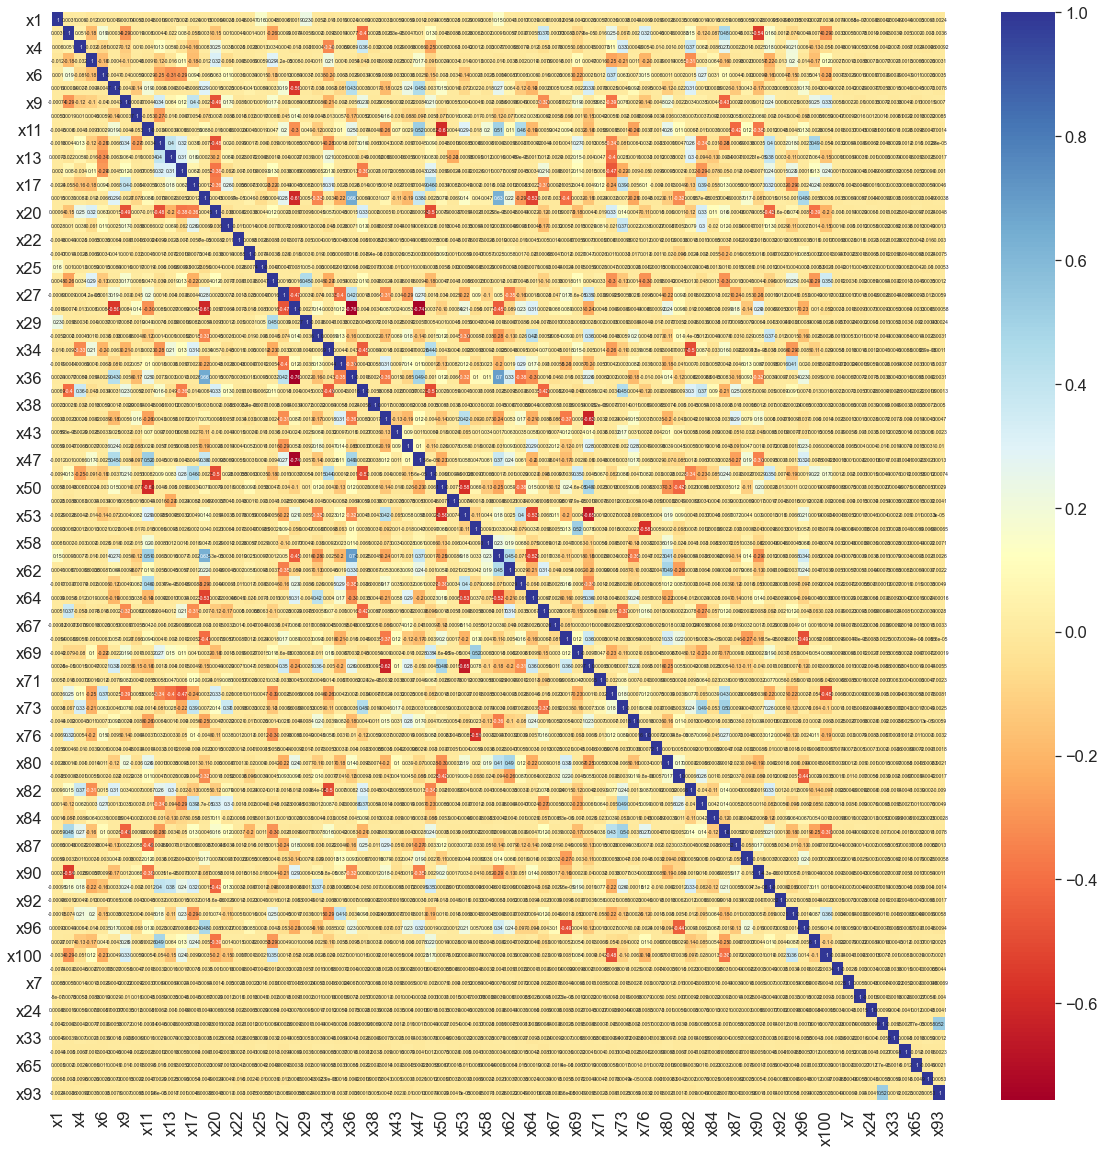

In [43]:
# now we will check for the colinearity using heat map 
import matplotlib.pyplot as plt 
X=imp_trn_df.iloc[:] 
y=train_predict[:]
corrmat = X.corr() 
top_corr_features = corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(imp_trn_df[top_corr_features].corr(),annot=True,annot_kws={'size': 5}, cmap="RdYlBu")

**Based on the heat map its hard to see any values.So lets use some other methods.**


In [45]:
#Importing scikit-learn modules from library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [46]:
#PCA analysis to see if any feature stand out 
X=imp_trn_df.iloc[:,0:79] 
y=train_predict[:] 
#feature extraction 
pca = PCA(n_components=79) 
fit = pca.fit(X) 
#summarize components 
print("Explained Variance: %s" % fit.explained_variance_ratio_) 
print(fit.components_)

Explained Variance: [0.06469137 0.05302426 0.05041265 0.0449769  0.04136201 0.03603022
 0.03462177 0.02997036 0.02630201 0.02560372 0.02183845 0.01950683
 0.01928278 0.01877695 0.01811976 0.01672075 0.01604576 0.01588012
 0.01439674 0.01400083 0.01326012 0.01324534 0.01313879 0.01295913
 0.01288678 0.01286573 0.01281581 0.0127054  0.01267309 0.01265492
 0.01256813 0.01247273 0.01244025 0.01240114 0.01233701 0.01215185
 0.01199196 0.01185101 0.01146288 0.01118841 0.01091264 0.01085923
 0.01060025 0.0103592  0.01014455 0.00981774 0.00915341 0.00866496
 0.00809586 0.00743572 0.00655776 0.0060139  0.00570919 0.00546647
 0.00490168 0.00480239 0.00431535 0.00409053 0.00391879 0.00337029
 0.00324485 0.00292493 0.00250026 0.00208385 0.00181834 0.00175205
 0.0013943  0.00112818 0.00100187 0.00089407 0.00080681 0.00071814
 0.0006598  0.00058007 0.0005263  0.00038903 0.00031393 0.00028718
 0.00015145]
[[-1.37370837e-02 -3.54419988e-02 -6.84596611e-03 ... -1.04015126e-03
   2.61816286e-03  2.02578

The result from PCA is not so intutive. Lets run some other techniques

In [45]:
# lets check with simple person correlation and see if any columns are highly correlated

def correlation(df, threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation(imp_trn_df, 0.6)
#len(set(corr_features))
corr_features

{'x28', 'x36', 'x47', 'x61', 'x70'}

The result is based on simple corelation. I want to further check the data with variance influence factor here. 

In [46]:
# I will do one more test for multi-colinearlity and see what stands out.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =pd.DataFrame()
vif['Variance inflation factor'] = [variance_inflation_factor(imp_trn_df.values, i) for i in range(imp_trn_df.shape[1])]
vif['feature names'] = imp_trn_df.columns

Its normally that we use 10 as threshold to cut off varaiance of the data. But in this data since we dont 
know what most of these feature really means and I have already filles null values with interative and frequency 
so I am going to use a higher value of 100

In [47]:
#Its normally that we use 10 as threshold to cut off varaiance of the data. But in this data since we dont 
#know what most of these feature really means and I have already filles null values with interative and frequency 
#so I am going to use a higher value of 10

high_vif_col = vif[vif['Variance inflation factor']>=10]
high_vif_col

,Variance inflation factor,feature names
1,16.096814,x2
8,12.183440,x11
21,13.795801,x28
24,11.475838,x34
26,16.890013,x36
27,11.573818,x37
32,12.760827,x47
33,22.511026,x48
36,14.603630,x53
37,15.708028,x56


Based on this imparetive VIF values of 100 and higher 19 features will be dropped from the imputed training datafreame

In [48]:
train_clean_df=imp_trn_df.drop(['x2','x11','x28','x34','x36','x37','x47','x48','x53','x56',
                                'x64','x68','x69','x76','x86'], axis=1)


In [49]:
train_clean_df.head()

,x1,x4,x5,x6,x8,x9,x10,x12,x13,x15,x17,x18,x20,x21,x22,x23,x25,x26,x27,x29,x32,x35,x38,x40,x43,x46,x50,x51,x58,x61,x62,x63,x66,x67,x70,x71,x72,x73,x75,x79,x80,x81,x82,x83,x84,x87,x88,x90,x91,x92,x94,x96,x97,x100,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
0,-1.421286,0.734820,-1.047197,-1.171538,0.149538,-0.460571,0.661698,0.448960,0.348319,-0.404365,-1.641760,-0.341878,0.667396,1.633700,2.080455,1.040955,-0.469096,1.517841,-0.899935,-0.181543,-0.607120,1.061521,0.005939,0.975115,0.698954,0.118036,-0.525209,0.798252,0.005941,-0.050981,1.242691,0.842283,0.820130,-1.348136,-0.522617,-2.142134,0.548119,0.142184,0.361431,0.345388,0.434538,-0.318273,1.239394,-1.491237,-2.249051,-0.132662,0.589261,-0.196945,-0.278604,-1.057843,1.043786,0.012738,-1.195336,0.805457,1.133789,0.618845,-0.902449,-0.903895,-0.419178,-0.685146,0.481545,-1.306842,-0.867980,-0.355767
1,-0.280019,1.011947,0.713660,-0.564701,0.820941,0.402488,0.902618,-0.441743,-0.910042,-0.795207,0.212029,-1.401285,0.517390,-0.462655,0.801586,0.140524,-0.259914,1.065887,-1.252224,0.306955,0.303830,-1.424994,-0.178006,-1.103087,-1.283206,0.608451,1.321334,0.327129,0.005941,-0.905175,0.019376,0.042198,0.499483,-0.012063,0.767260,-0.002887,-0.484269,0.059334,-0.329280,-0.003861,0.663906,1.079035,0.571618,0.344975,0.000352,1.065635,0.725104,0.603615,0.453072,1.740928,-0.423755,-1.395653,0.252884,0.229807,-0.300273,0.638916,-1.857519,1.106324,-0.419178,-0.647791,-2.015525,0.890761,-0.867980,-0.355767
2,0.715641,0.097596,0.281462,0.517269,0.655022,-0.986047,-1.687003,-0.542804,-0.995126,0.135474,0.262270,-0.616185,-0.327420,-0.231455,-0.042675,-0.129291,-0.264984,-0.241502,0.748328,2.231444,1.084443,-0.756277,-0.196808,-0.183258,-0.342304,-1.457949,1.750278,0.186022,-3.372477,-1.114568,-1.095656,-0.157157,-0.022945,-0.012063,0.751190,-0.002887,-0.268630,0.430472,-0.130300,0.345388,-1.715595,-1.699016,-0.127411,-0.524798,0.000352,0.561875,-0.759884,0.856252,1.426923,-1.264505,0.335390,-0.982505,-1.103110,1.776191,-1.508507,-0.083635,-0.537461,1.106324,-0.419178,-0.283113,-1.909984,-1.340272,-0.789583,-0.355767
3,0.463922,1.204139,-0.200051,-0.614409,-0.362856,-0.455942,1.682477,-1.238867,0.030295,-1.390406,-0.614101,-0.762927,0.780526,-0.184930,1.897393,0.488294,0.947804,-0.388695,0.502848,0.943031,0.274159,-0.034510,0.485996,-0.547467,-1.422154,-1.211025,-0.146143,1.060916,0.005941,-1.180219,-1.702673,0.216608,-0.316528,-0.012063,-0.083202,-3.545463,-0.010591,-0.226566,0.130579,0.345388,-1.003632,0.906481,0.290566,-0.213765,0.000352,1.755399,1.231060,-0.057076,0.621568,0.673371,0.091575,-0.922773,-0.414950,0.571178,1.019314,-0.575371,-0.177368,1.106324,-0.419178,-0.666235,-1.909984,-1.340272,-1.140031,-0.355767
4,-0.065760,2.326799,0.061024,1.011583,-0.509334,-0.289985,-0.743549,1.172094,-0.001678,-0.819324,0.483306,-0.300820,-0.759031,0.857465,-0.599905,-1.279547,0.546115,0.277583,-0.473684,-0.351861,0.914705,-0.807369,-0.166424,0.691748,0.490833,1.946034,0.259048,1.122845,-4.305046,-0.694523,-1.124598,0.283545,-0.133174,-0.012063,0.985029,-0.002887,0.214566,0.445917,0.199254,0.345388,-1.373755,0.441807,0.188774,-0.169596,0.000352,0.566806,-1.323734,-0.066871,2.082176,-1.011122,-0.500614,-0.165339,0.855504,-1.352811,-1.535564,1.090510,0.970773,1.106324,2.385624,-0.408719,0.486929,-1.340272,-1.001099,2.810828


In [50]:
train_clean_df.shape

(40000, 64)

Lets look on the data imbalance one more time for the cleaned training data.

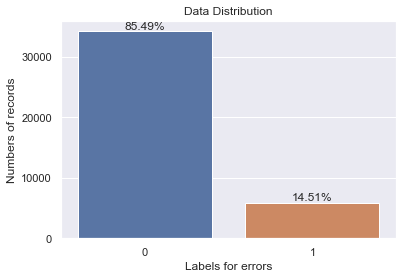

In [51]:
# Graphical representation of the target label percentage.
total_len = len(trn_raw['y'])
sns.set()
sns.countplot(trn_raw['y']).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for errors")
ax.set_ylabel("Numbers of records")
plt.show()

In [52]:
train_predict.y.value_counts()

0    34197
1     5803
Name: y, dtype: int64

In [53]:
clean_data=pd.concat([train_predict, train_clean_df], axis=1)

In [54]:
clean_data.head()

,y,x1,x4,x5,x6,x8,x9,x10,x12,x13,x15,x17,x18,x20,x21,x22,x23,x25,x26,x27,x29,x32,x35,x38,x40,x43,x46,x50,x51,x58,x61,x62,x63,x66,x67,x70,x71,x72,x73,x75,x79,x80,x81,x82,x83,x84,x87,x88,x90,x91,x92,x94,x96,x97,x100,x3,x7,x19,x24,x31,x33,x60,x65,x77,x93
0,0,-1.421286,0.734820,-1.047197,-1.171538,0.149538,-0.460571,0.661698,0.448960,0.348319,-0.404365,-1.641760,-0.341878,0.667396,1.633700,2.080455,1.040955,-0.469096,1.517841,-0.899935,-0.181543,-0.607120,1.061521,0.005939,0.975115,0.698954,0.118036,-0.525209,0.798252,0.005941,-0.050981,1.242691,0.842283,0.820130,-1.348136,-0.522617,-2.142134,0.548119,0.142184,0.361431,0.345388,0.434538,-0.318273,1.239394,-1.491237,-2.249051,-0.132662,0.589261,-0.196945,-0.278604,-1.057843,1.043786,0.012738,-1.195336,0.805457,1.133789,0.618845,-0.902449,-0.903895,-0.419178,-0.685146,0.481545,-1.306842,-0.867980,-0.355767
1,1,-0.280019,1.011947,0.713660,-0.564701,0.820941,0.402488,0.902618,-0.441743,-0.910042,-0.795207,0.212029,-1.401285,0.517390,-0.462655,0.801586,0.140524,-0.259914,1.065887,-1.252224,0.306955,0.303830,-1.424994,-0.178006,-1.103087,-1.283206,0.608451,1.321334,0.327129,0.005941,-0.905175,0.019376,0.042198,0.499483,-0.012063,0.767260,-0.002887,-0.484269,0.059334,-0.329280,-0.003861,0.663906,1.079035,0.571618,0.344975,0.000352,1.065635,0.725104,0.603615,0.453072,1.740928,-0.423755,-1.395653,0.252884,0.229807,-0.300273,0.638916,-1.857519,1.106324,-0.419178,-0.647791,-2.015525,0.890761,-0.867980,-0.355767
2,1,0.715641,0.097596,0.281462,0.517269,0.655022,-0.986047,-1.687003,-0.542804,-0.995126,0.135474,0.262270,-0.616185,-0.327420,-0.231455,-0.042675,-0.129291,-0.264984,-0.241502,0.748328,2.231444,1.084443,-0.756277,-0.196808,-0.183258,-0.342304,-1.457949,1.750278,0.186022,-3.372477,-1.114568,-1.095656,-0.157157,-0.022945,-0.012063,0.751190,-0.002887,-0.268630,0.430472,-0.130300,0.345388,-1.715595,-1.699016,-0.127411,-0.524798,0.000352,0.561875,-0.759884,0.856252,1.426923,-1.264505,0.335390,-0.982505,-1.103110,1.776191,-1.508507,-0.083635,-0.537461,1.106324,-0.419178,-0.283113,-1.909984,-1.340272,-0.789583,-0.355767
3,0,0.463922,1.204139,-0.200051,-0.614409,-0.362856,-0.455942,1.682477,-1.238867,0.030295,-1.390406,-0.614101,-0.762927,0.780526,-0.184930,1.897393,0.488294,0.947804,-0.388695,0.502848,0.943031,0.274159,-0.034510,0.485996,-0.547467,-1.422154,-1.211025,-0.146143,1.060916,0.005941,-1.180219,-1.702673,0.216608,-0.316528,-0.012063,-0.083202,-3.545463,-0.010591,-0.226566,0.130579,0.345388,-1.003632,0.906481,0.290566,-0.213765,0.000352,1.755399,1.231060,-0.057076,0.621568,0.673371,0.091575,-0.922773,-0.414950,0.571178,1.019314,-0.575371,-0.177368,1.106324,-0.419178,-0.666235,-1.909984,-1.340272,-1.140031,-0.355767
4,0,-0.065760,2.326799,0.061024,1.011583,-0.509334,-0.289985,-0.743549,1.172094,-0.001678,-0.819324,0.483306,-0.300820,-0.759031,0.857465,-0.599905,-1.279547,0.546115,0.277583,-0.473684,-0.351861,0.914705,-0.807369,-0.166424,0.691748,0.490833,1.946034,0.259048,1.122845,-4.305046,-0.694523,-1.124598,0.283545,-0.133174,-0.012063,0.985029,-0.002887,0.214566,0.445917,0.199254,0.345388,-1.373755,0.441807,0.188774,-0.169596,0.000352,0.566806,-1.323734,-0.066871,2.082176,-1.011122,-0.500614,-0.165339,0.855504,-1.352811,-1.535564,1.090510,0.970773,1.106324,2.385624,-0.408719,0.486929,-1.340272,-1.001099,2.810828


In [55]:
clean_data.to_csv('clean_data_for_classification.csv', index=False)
